# In class - 6

Goals: Be able to confidently produce simple plots with Matplotlib. Explore plotting options.

### In-clasee

In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

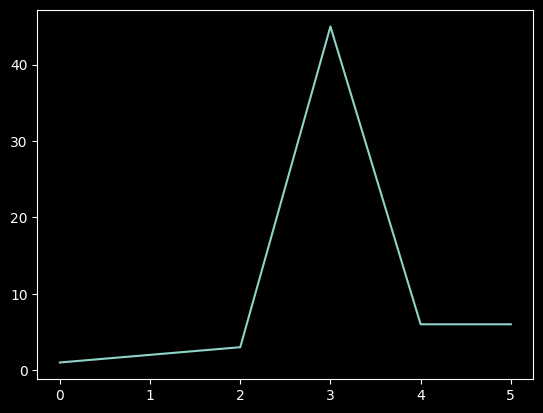

In [2]:
# implicid plotting
data1 = [1, 2, 3, 45, 6, 6]
plt.plot(data1)

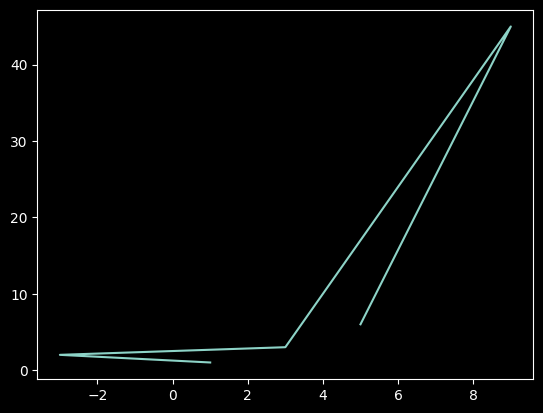

In [3]:
# add x data
x = [1,-3,3,9,5,5]

plt.plot(x,data1)

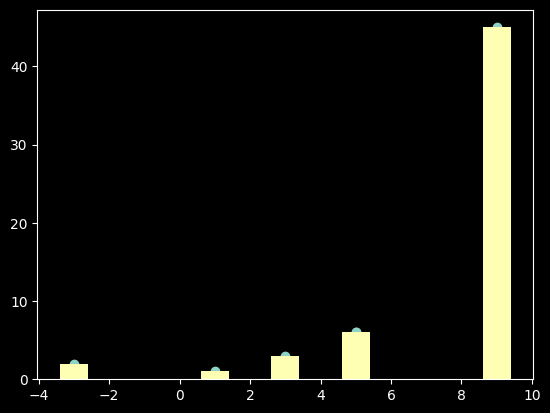

In [4]:
# change the plot type

plt.scatter(x, data1)
plt.bar(x, data1)
plt.show()

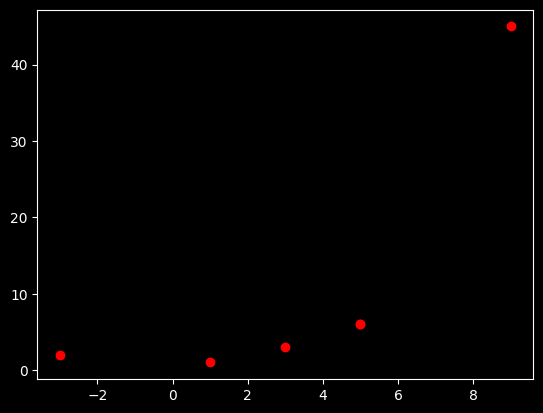

In [5]:
# change default colors

plt.scatter(x, data1, c = 'red')

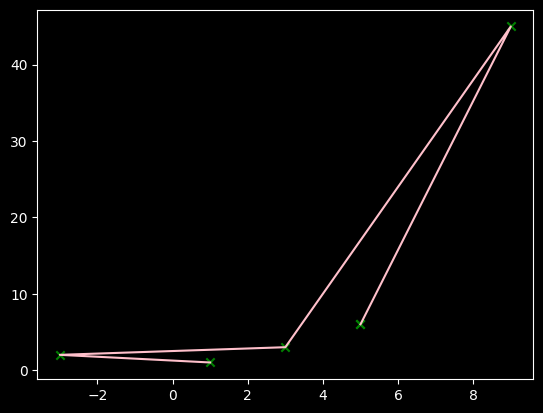

In [6]:
# change the lines and shapes

plt.plot(x, data1, c = 'pink')
plt.scatter(x, data1, c = 'green', marker = 'x')

Text(0.5, 1.0, 'Title of the plot')

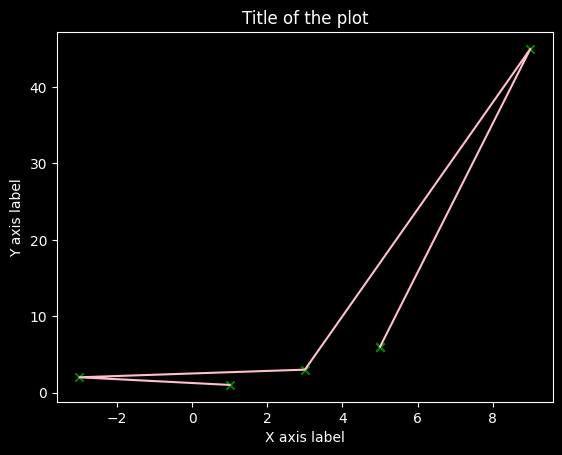

In [7]:
# add axis labels and title

plt.plot(x, data1, c = 'pink')
plt.scatter(x, data1, c = 'green', marker = 'x')
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Title of the plot')


Text(0.5, 1.0, 'Title of the plot')

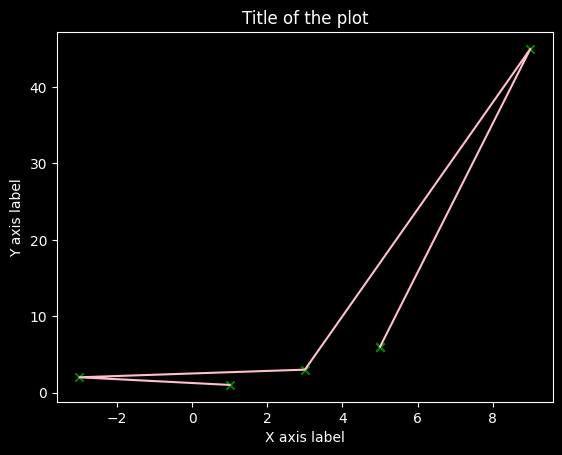

In [8]:
# remove the spines

plt.plot(x, data1, c = 'pink')
plt.scatter(x, data1, c = 'green', marker = 'x')
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Title of the plot')



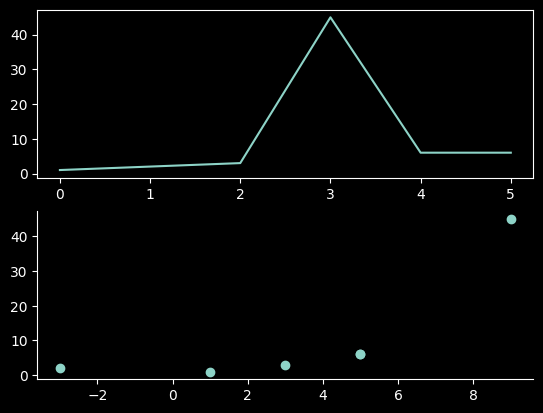

In [9]:
# everything as above but object oriented
# subplots

fig, ax = plt.subplots(2,1)

ax[0].plot(data1)
ax[1].scatter(x, data1)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.show()

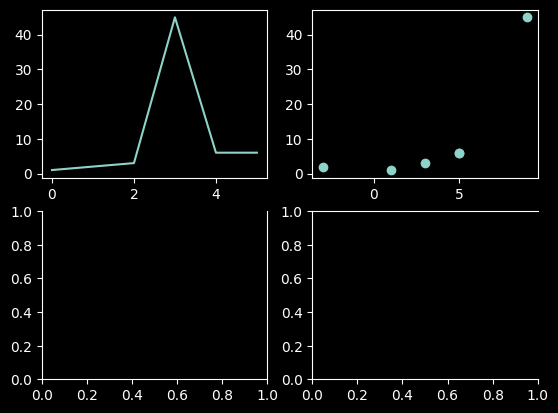

In [10]:
# change the axis and use a grid

fig, ax = plt.subplots(2,2)

ax[0,0].plot(data1)
ax[0,1].scatter(x, data1)
ax[1,0].spines["top"].set_visible(False)
ax[1,1].spines["right"].set_visible(False)
# ax[1].set_xlabel('X axis label')
plt.show()

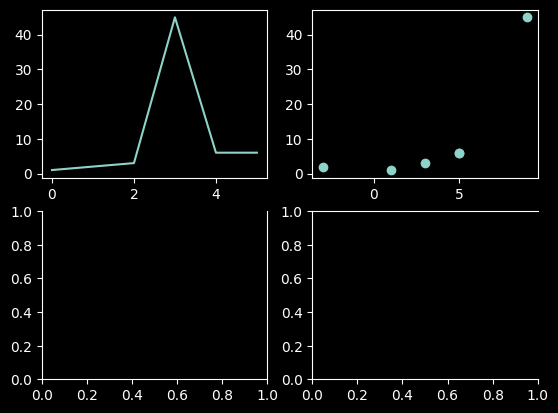

In [11]:
# rotate the labels 45 degrees

fig, ax = plt.subplots(2,2)

ax[0,0].plot(data1)
ax[0,1].scatter(x, data1)
ax[1,0].spines["top"].set_visible(False)
ax[1,1].spines["right"].set_visible(False)

plt.show()

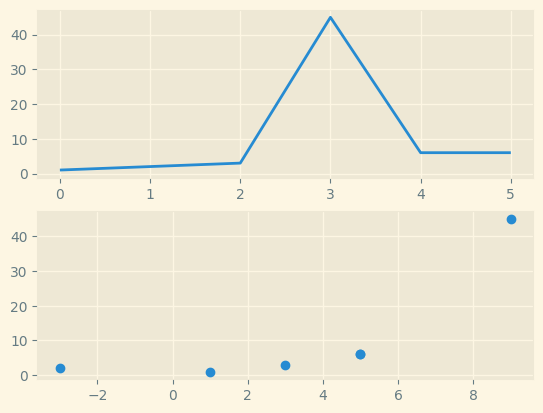

In [12]:
# change the style

with plt.style.context('Solarize_Light2'):
    
    fig, ax = plt.subplots(2,1)

    ax[0].plot(data1)
    ax[1].scatter(x, data1)
    plt.show()

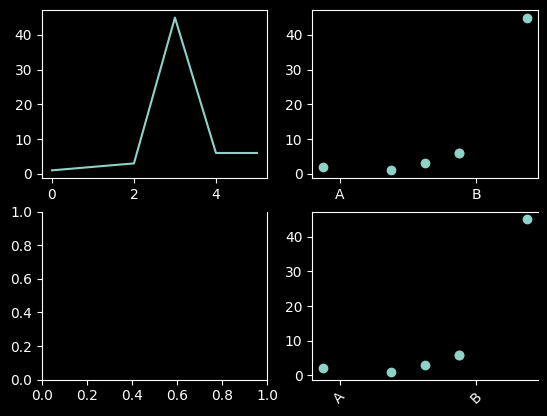

In [13]:
# change the ticks labels
# rotation 

fig, ax = plt.subplots(2,2)

ax[0,0].plot(data1)
ax[0,1].scatter(x, data1)
ax[1,0].spines["top"].set_visible(False)
ax[1,1].scatter(x, data1)
ax[1,1].spines["right"].set_visible(False)

ax[0,1].set_xticks(ticks = [-2, 6], labels = ['A', 'B'])
ax[1,1].set_xticks(ticks = [-2, 6], labels = ['A', 'B'], rotation = 45)


In [14]:
# save the figure

save_path = '/Users/verjim/Desktop/'
fig.savefig( save_path + 'my_first_figure.svg', \
            format = 'svg', bbox_inches = 'tight', dpi = 1000)

### Exercise 1

The code below was written by someone who was a little unfamiliar with how matplotlib works.

Question 1. Why are the lines and labels only appearing in the second plot?

Question 2. Change the code so that it uses the object-oriented interface. Does the plot now look like what you'd expect?

In [ ]:
# generating some data

X = np.linspace( -np.pi, np.pi, 257, endpoint = True)
C, S = np.cos(X), np.sin(X)

# same as above but with fewer data points
Xfew = np.linspace( -np.pi, np.pi, 8, endpoint = True)
Cfew, Sfew = np.cos(Xfew), np.sin(Xfew)

In [ ]:
fig, axs = plt.subplots(2, 1, num = 1, figsize=(9, 4), clear = True)

ax = axs[0]
plt.plot(X, C)
plt.plot(X, S)
plt.xlabel('Angle')
plt.ylabel('Trig (fine)')
plt.xlim([-np.pi, np.pi])

ax = axs[1]
plt.plot(Xfew, Cfew)
plt.plot(Xfew, Sfew)
plt.xlabel('Angle')
plt.ylabel('Trig (fine)')
plt.xlim([-np.pi, np.pi])

In [ ]:
# solution cell

fig, axs = plt.subplots(2, 1, num = 1, figsize=(9, 4), clear = True)

ax = axs[0]
axs[0].plot(X, C)
axs[0].plot(X, S)
axs[0].set_xlabel('Angle')
axs[0].set_ylabel('Trig (fine)')
axs[0].set_xlim([-np.pi, np.pi])

ax = axs[1]
axs[1].plot(Xfew, Cfew)
axs[1].plot(Xfew, Sfew)
axs[1].set_xlabel('Angle')
axs[1].set_ylabel('Trig (fine)')
axs[1].set_xlim([-np.pi, np.pi])

plt.show()

### 2. Time dependency plot

In [90]:
# load the data
with open('../data/time_dependency_AP_TH.json') as f:
    time_dep_data = json.load(f)

In [ ]:
# explore the data

print(type(time_dep_data))
print(time_dep_data.keys())

print(type(time_dep_data['Ctrl']))

print(time_dep_data['Ctrl'].keys())
print(time_dep_data['Ctrl']['Rin'])

In [ ]:
x_c = np.array(time_dep_data['Ctrl']['hrs_after_OP'])
y_c = np.array(time_dep_data['Ctrl']['TH'])

x_h = np.array(time_dep_data['high K']['hrs_after_OP'])
y_h = np.array(time_dep_data['high K']['TH'])

In [ ]:
# create a figure object
fig, ax = plt.subplots(figsize = (8,6), sharex = True, sharey = True)

# scatter the data
ax.scatter(x_c, y_c, c = 'orange', label = 'Ctrl', alpha = 0.45)
ax.scatter(x_h, y_h, c = 'green', label = 'high K', alpha = 0.45)

# regression lines with polynomic fit
slope_c, intercept_c = np.polyfit(x_c, y_c, 1)
y_est_c = slope_c * x_c  + intercept_c
y_err_c = x_c.std() * np.sqrt(1/len(x_c) + (x_c - x_c.mean())**2 / np.sum((x_c - x_c.mean())**2))

# plot regression line
ax.plot(x_c, slope_c * x_c + intercept_c, \
        color = 'orange', linestyle = '--', linewidth = 2)
# plots the error band
ax.fill_between(x_c, y_est_c - y_err_c, y_est_c + y_err_c, alpha = 0.2, color = 'orange')

slope_h, intercept_h = np.polyfit(x_h, y_h, 1)
y_est_h = slope_h * x_h  + intercept_h
y_err_h = x_h.std() * np.sqrt(1/len(x_h) + (x_h - x_h.mean())**2 / np.sum((x_h - x_h.mean())**2))
ax.plot(x_h, slope_h * x_h + intercept_h, \
        color='green', linestyle = '--', linewidth = 2)
ax.fill_between(x_h, y_est_h - y_err_h, y_est_h + y_err_h, alpha = 0.2, color = 'green')

ax.set_title('small title')
ax.set_xlabel('Hours after OP')
ax.set_ylabel('mV')

fig.legend(loc='upper right', fontsize='small')
fig.suptitle('AP Threshold')

save_path = '/Users/verjim/Desktop/'
# make the directory, if it doens't exist
os.makedirs(save_path, exist_ok = True)
# fig.savefig(dest_dir + data_type + param + '.png')
fig.savefig(save_path + 'fig_name.svg', format = 'svg', bbox_inches = 'tight', dpi = 100)
plt.show()
plt.close()

#### Exerceise 2 

For homework, using the data from above, plot the time dependency of the Rin (Input resistance)

- change the colors. It's always nice to consider colors that are suitable for colorblind people : )
- plot the median of the Rin over time, binning at 0-10, 11-20, 21-30, etc. Use the diamond shape in bigger size than the dots
- add a legend in the top left corner
- think about what you could change in the code to make it less repetitive. This is mainly a styling issue. Try a few options. Is your code more readable?

In [ ]:
# make the code shorter

def plot_param_over_time(time_dep_data, param, colors):

    param_dict = {
    'Rin': ['Input resistance', 'MΩ', [0,100,200,300,400]],  
    'TH': ['AP threshold', 'mV', [-50, -40, -30, -20, -10 ]],
    }
    # create a figure object
    fig, ax = plt.subplots(figsize = (8,6), sharex = True, sharey = True)

    for treatment in time_dep_data.keys():
        
        data_x = np.array(time_dep_data[treatment]['hrs_after_OP'])
        data_y = np.array(time_dep_data[treatment][param])
        
        # scatter the data
        ax.scatter(data_x, data_y, c = colors[treatment], label = treatment, alpha = 0.45)

        # regression lines with polynomic fit
        slope, intercept = np.polyfit(data_x, data_y, 1)
        y_est = slope * data_x  + intercept
        y_err = data_x.std() * np.sqrt(1/len(data_x) + (data_x - data_x.mean())**2 / np.sum((data_x - data_x.mean())**2))

        # plot regression line
        ax.plot(data_x, y_est, color = colors[treatment], linestyle = '--', linewidth = 2)
        # plots the error band
        # dealing with the problem of non-unique x values
        unique_x = np.unique(data_x, return_index=True)[1]  # Get indices of unique values
        ax.fill_between(data_x[unique_x ], (y_est - y_err)[unique_x ],  (y_est + y_err)[unique_x ], \
                        alpha = 0.2, color = colors[treatment])
        
        # adding the diamonds
        x_sort_indx = np.argsort(data_x)
 
        medians = []
        for start in range(0, int(np.max(data_x)) + 1, 10):
            condition = (data_x >= start) & (data_x < start + 10) # gives a bool
            medians.append(np.median(data_y[condition])) 

        x_coor_medians = np.arange(10, 100, 10)[:len(medians)]
        ax.plot(x_coor_medians, medians, 'D', color = colors[treatment], markersize = 14)

    ax.set_title('over time')
    ax.set_xlabel('Hours after OP')
    ax.set_ylabel(param_dict[param][1])

    fig.legend(loc = 'upper left')
    fig.suptitle(param_dict[param][0])

    plt.show()


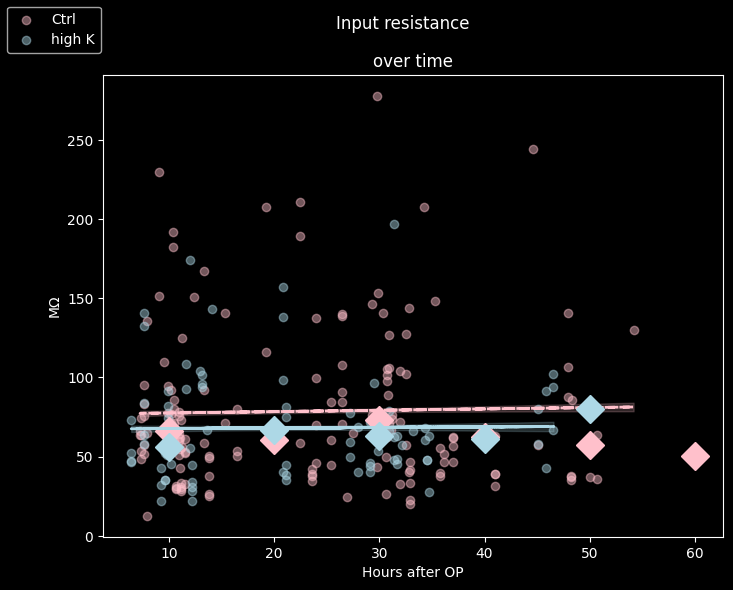

In [249]:
colors = {
    'Ctrl': 'pink',
    'high K': 'lightblue'
}

plot_param_over_time(time_dep_data, 'Rin', colors)

### Exercise 3 Line plots and Subplots

We worked with this data and code in the HW for lesson 3.

Start by going over the code line by line and understanding what it does. It's useful to add commented to it so that the chances of remembering are higher.

Try to reproduce the plots from the image below (if not displaying, it's on GitHub called solution_3.png in img\ folder img\solution_3.png). The written instructions might not be clear enough. Don't worry about the black background.
In a new code cell, change the code so that:
1. all sweeps for D1 are plotted on top of each other in the left plot. D2 sweeps are plotted in the same way on the right.
2. add two subplots to the figure below and two above that are plotting the previous and the next sweep.
3. add a legend to the plot.
4. pack the whole thing in a function. What are its arguments? Does it makes sense to use two functions? What would they be?

In [ ]:
# Load the data

with open('../data/charact_data.json') as f:
     charact_data = json.load(f)
charact_data = {key: np.array(charact_data[key]) for key in charact_data.keys()}
inj = [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300]

In [ ]:
# defining the parameters 

inj = [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300]
swp_num1 = 5
swp_num2 = 5
sampling_rate = 20 # in kHz

In [ ]:
all_swps = np.shape(charact_data['D1'])[0]
swp_len_ms = np.shape(charact_data['D1'])[1] / sampling_rate
x = np.linspace(0, swp_len_ms, len(charact_data['D1'][0,:]))
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (12,5))

ax[0].plot(x, charact_data['D1'][swp_num1,:], color = plt.cm.Oranges(np.linspace(1, 0.25, all_swps))[swp_num1])
ax[1].plot(x, charact_data['D2'][swp_num2,:], color = plt.cm.Greens(np.linspace(1, 0.25, all_swps))[swp_num2])

ax[0].set_title('Sweep number '+ str(swp_num1) +' from D1\n'\
                'current step of ' + str(inj[swp_num1]) + ' pA')
ax[0].set_xlabel('ms')
ax[0].set_ylabel('mV')

ax[1].set_title('Sweep number '+ str(swp_num2) +' from D2\n'\
                'current step of ' + str(inj[swp_num2]) + ' pA')
ax[1].set_xlabel('ms')
ax[1].set_ylabel('mV')
ax[1].yaxis.set_tick_params(labelleft=True)

plt.show()

#### Solutions

In [ ]:
# 3.1

fig, ax = plt.subplots(1, 2, sharey = True, figsize = (12,5))

for swp in range(all_swps):
    ax[0].plot(x, charact_data['D1'][swp,:], color = plt.cm.Oranges(np.linspace(1, 0.25, all_swps))[swp])
    ax[1].plot(x, charact_data['D2'][swp,:], color = plt.cm.Greens(np.linspace(1, 0.25, all_swps))[swp])

ax[0].set_title('All sweeps D1')
ax[0].set_xlabel('ms')
ax[0].set_ylabel('mV')

ax[1].set_title('All sweeps D2')
ax[1].set_xlabel('ms')
ax[1].set_ylabel('mV')
ax[1].yaxis.set_tick_params(labelleft=True)

fig.suptitle('Current step from ' + str(inj[0]) + ' pA to ' + str(inj[swp]) + ' pA')

plt.show()

In [ ]:
# 3.2
# long solution, not finished because that's not why we code

# change the number of subplots plots
fig, ax = plt.subplots(3, 2, figsize = (12,9))

# previous sweeps
ax[0,0].plot(x, charact_data['D1'][swp_num1-1,:], color = plt.cm.Oranges(np.linspace(1, 0.25, all_swps))[swp_num1-1])
ax[0,1].plot(x, charact_data['D2'][swp_num1-1,:], color = plt.cm.Oranges(np.linspace(1, 0.25, all_swps))[swp_num1-1])

# requested sweep
ax[1,0].plot(x, charact_data['D1'][swp_num1,:], color = plt.cm.Oranges(np.linspace(1, 0.25, all_swps))[swp_num1])
ax[1,1].plot(x, charact_data['D2'][swp_num2,:], color = plt.cm.Greens(np.linspace(1, 0.25, all_swps))[swp_num2])

# next sweep
ax[2,0].plot(x, charact_data['D1'][swp_num1+1,:], color = plt.cm.Oranges(np.linspace(1, 0.25, all_swps))[swp_num1+1])
ax[2,1].plot(x, charact_data['D2'][swp_num2+1,:], color = plt.cm.Greens(np.linspace(1, 0.25, all_swps))[swp_num2+1])


# change the fontsize of hte subplot titles
ax[1,0].set_title('Sweep number '+ str(swp_num1) +' from D1 '\
                'current step of ' + str(inj[swp_num1]) + ' pA', size = 13)
ax[1,0].set_xlabel('ms')
ax[1,0].set_ylabel('mV')

ax[1,1].set_title('Sweep number '+ str(swp_num2) +' from D2 '\
                'current step of ' + str(inj[swp_num2]) + ' pA', size = 13)
ax[1,1].set_xlabel('ms')
ax[1,1].set_ylabel('mV')
ax[1,1].yaxis.set_tick_params(labelleft=True)

# make more space for the titles of the individual subplots
plt.subplots_adjust(hspace = 0.4)

plt.show()

In [ ]:
# more sensible solution

# how can we make the code from above shorter?
# what is repeating? For loops?

In [ ]:
# pre-defining common parameters

charact_data = {key: np.array(charact_data[key]) for key in charact_data.keys()}
inj = [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300]
days = list(charact_data.keys())

all_swps = np.shape(charact_data['D1'])[0]
swp_len_ms = np.shape(charact_data['D1'])[1] / sampling_rate
x = np.linspace(0, swp_len_ms, len(charact_data['D1'][0,:]))

color_dict = {
    'D1': plt.cm.Oranges(np.linspace(1, 0.25, all_swps)),
    'D2': plt.cm.Greens(np.linspace(1, 0.25, all_swps))
}

In [ ]:
def plot_sweeps(swp_num, all_swps, x, days, color_dict):
    grid_row = 3
    grid_col = 2

    _, ax = plt.subplots(grid_row, grid_col, sharex = True, figsize = (12,9))

    # loop through the rows
    for i in range(grid_row):
        # loop through columns
        for j, day in enumerate(days):
            a = swp_num - 1 + i

            plot_data = charact_data[day][a, :]

            ax[i,j].plot(x, plot_data, 
                        color = color_dict[day][a])
            
            ax[i,j].set_title('Sweep number '+ str(a) +' from ' + day + \
                                ' current step of ' + str(inj[a]) + ' pA', size = 13)
            ax[i,j].yaxis.set_tick_params(labelleft=True)
            plt.subplots_adjust(hspace = 0.6)

    ax[i,j].set_xlabel('ms')
    ax[i,j].set_ylabel('mV')
    for row in ax:
        for ax in row[0:]:
            ax.sharey(row[0])

    plt.show()

In [ ]:
plot_sweeps(5, all_swps, x, days, color_dict)

In [87]:
# add a legend 

def plot_sweeps_legend(swp_num, all_swps, x, days, color_dict):
    grid_row = 3
    grid_col = 2

    fig, ax = plt.subplots(grid_row, grid_col, sharex = True, figsize = (10,7))

    # loop through the rows
    for i in range(grid_row):
        # loop through columns
        for j, day in enumerate(days):
            a = swp_num - 1 + i

            plot_data = charact_data[day][a, :]
            
            # condition for the legend
            if i == 0:
                ax[i,j].plot(x, plot_data, 
                            color = color_dict[day][a], label = day)
            else:
                ax[i,j].plot(x, plot_data, 
                        color = color_dict[day][a])

            ax[i,j].set_title('Sweep number '+ str(a) +' from ' + day + \
                                ' current step of ' + str(inj[a]) + ' pA', size = 13)
            ax[i,j].yaxis.set_tick_params(labelleft=True)
            plt.subplots_adjust(hspace = 0.6)

    ax[i,j].set_xlabel('ms')
    ax[i,j].set_ylabel('mV')
    fig.legend(loc='upper right')
    # make the axis the same scale
    for row in ax:
        for ax in row[0:]:
            ax.sharey(row[0])

    plt.show()

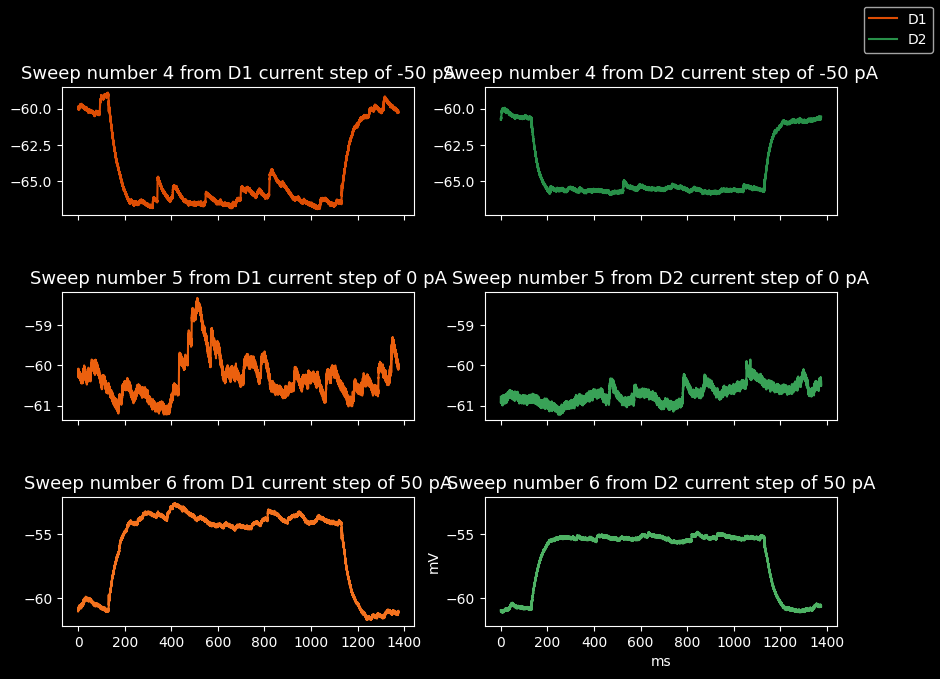

In [88]:
plot_sweeps_legend(5, all_swps, x, days, color_dict)

### Exercise 4 Scatterplots with Boxplots

Explore the code for the plot below. Try to understand it and comment it. You'll need it for the next exercise.

In [ ]:
# load the data
with open('../data/time_dependency_AP_TH.json') as f:
    time_dep_data = json.load(f)

In [ ]:
param = 'Rin'
treatments = ['Ctrl', 'high K']
colors = {
    'CtrlD1': '#c875c4', #'#dede00', 'MediumPurple2'
    'CtrlD2': '#ff7f00',
    'high KD1': '#c875c4', # '#dede00',
    'high KD2': '#4daf4a'
}

day_labels = ['D1', 'D2']

titles_dict = {
    'Rin': ['Input resistance', 'MΩ', [0,100,200,300,400]],   
    'TH': ['AP threshold', 'mV', [-50, -40, -30, -20, -10 ]]
 }

In [ ]:
fig2 = plt.figure(figsize=(9,7))
ax = plt.subplot(1,1,1)

label_ = []
num_cels = {}


for i, tr in enumerate(treatments):
    data_tr = time_dep_data[tr]
    # make numpy arrays
    data_tr = {key: np.array(data_tr[key]) for key in data_tr.keys()}

    # separate on D1 and D2
    indx_d1 = np.where(data_tr['hrs_inc'] == 0) # D1 no inccubation
    indx_d2 = np.where(data_tr['hrs_inc'] != 0)
    indx_days = (indx_d1, indx_d2)

    for j, day_indx in enumerate(indx_days):
        k = j + 2*i
        day = day_labels[j]
        
        day_tr_data = data_tr[param][day_indx]

        median_d1 = np.median(day_tr_data)
        x = np.linspace(0.65 + k, 1.35 + k, len(day_tr_data))
    
        ax.boxplot(day_tr_data, positions = [k + 0.5], notch = True, patch_artist=True, \
                   boxprops=dict(facecolor=colors[tr + day], alpha = 0.75), \
            medianprops = dict(linewidth=2.3, color = 'k'))
        ax.scatter(x, day_tr_data, c = colors[tr + day], s = 80, alpha = 0.75)
            
        label_.append(day + '\n' + tr)
        num_cels[tr + ' ' + day] = len(day_tr_data)
    
        # ax.text(1 + 2*i, int(np.max(df[param])), tr, size = 17, c = colors[tr + day])
        ax.text(k + 0.65, int((1 - 0.15) * np.max(data_tr[param])), 'n = ' + str(len(day_tr_data)), size = 12, c = colors[tr + day])

    #plt.boxplot(data_boxplot, showbox = False)
ax.tick_params(axis='y', labelsize=22)
ax.set_xticks(ticks = [0.7, 1.7, 2.7, 3.7], labels = label_, size = 20)

plt.title(titles_dict[param][0], fontsize = 19, x = 0.5, y = 1)
ax.set_ylabel(titles_dict[param][1], fontsize = 24)
ax.set_yticks(ticks = titles_dict[param][2])

# plt.subplots_adjust(hspace=0.35)
# fig2.patch.set_facecolor('white')
# fig2.tight_layout()

# date = str(datetime.date.today())
# os.makedirs(destination_dir, exist_ok=True)
# # plt.savefig(destination_dir  + date + '_plot_' + param + '.pdf')
# plt.savefig(destination_dir  + date + '_plot_' + param + '.svg', \
#     format = 'svg', bbox_inches = 'tight', dpi = 1000)
# plt.close(fig2)


#### Exercise 4 

Create a plotting function using the code above. 

Consider carefully what would be the variabels that you'd pass to the functon?
What would be the default parameters?
How will you create the name of the plot so that you are not overwriting the previous one?

###  Exercise 5 Style Sheets

*Following section was creted by Guillermo and me for ASPP 2023 DataViz Lecture*

Sometimes, there are some plotting settings that we want to apply to all of our plots. (E.g., a new color cycle, changing the axes spines to dark grey, etc.) The easiest way to do that is to use [style sheets](https://matplotlib.org/stable/tutorials/introductory/customizing.html). Matplotlib has [several built in](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), or you can make your own once you know which values in `plt.rcParams` you want to update.

To use a style sheet for all plots in a session:
```python
plt.style.use(<sheet_name>)
```
If you want to use a style sheet on just a single plot without changing the default plot settings you can use a context manager:
```python
with plt.style.context(<sheet_name>):
    plt.plot(...)
```

**Explore** the ones that start with 'seaborn', like **'poster'**, **'talk'**, **paper'** and **'notebook'**. What is different between them?

### Exercise 6. Super extra

Find some data to plot. It could be your own or somthing found on the internet. Play around with it and try different plotting options. Using for loops, if statements. Writing your own functions.